In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')

upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
sess = tf.Session()

In [5]:
epochs = 20
batch_size = 512
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for _ in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6831
Epoch: 1/20... Training loss: 0.6762
Epoch: 1/20... Training loss: 0.6675
Epoch: 1/20... Training loss: 0.6570
Epoch: 1/20... Training loss: 0.6442
Epoch: 1/20... Training loss: 0.6294
Epoch: 1/20... Training loss: 0.6132
Epoch: 1/20... Training loss: 0.5942
Epoch: 1/20... Training loss: 0.5748
Epoch: 1/20... Training loss: 0.5577
Epoch: 1/20... Training loss: 0.5404
Epoch: 1/20... Training loss: 0.5319
Epoch: 1/20... Training loss: 0.5277
Epoch: 1/20... Training loss: 0.5243
Epoch: 1/20... Training loss: 0.5204
Epoch: 1/20... Training loss: 0.5188
Epoch: 1/20... Training loss: 0.5225
Epoch: 1/20... Training loss: 0.5036
Epoch: 1/20... Training loss: 0.4918
Epoch: 1/20... Training loss: 0.4843
Epoch: 1/20... Training loss: 0.4763
Epoch: 1/20... Training loss: 0.4705
Epoch: 1/20... Training loss: 0.4585
Epoch: 1/20... Training loss: 0.4599
Epoch: 1/20... Training loss: 0.4465
Epoch: 1/20... Training loss: 0.4396
Epoch: 1/20... Training loss: 0.4332
E

Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1514
Epoch: 3/20... Training loss: 0.1511
Epoch: 3/20... Training loss: 0.1567
Epoch: 3/20... Training loss: 0.1576
Epoch: 3/20... Training loss: 0.1552
Epoch: 3/20... Training loss: 0.1521
Epoch: 3/20... Training loss: 0.1555
Epoch: 3/20... Training loss: 0.1543
Epoch: 3/20... Training loss: 0.1547
Epoch: 3/20... Training loss: 0.1539
Epoch: 3/20... Training loss: 0.1523
Epoch: 3/20... Training loss: 0.1519
Epoch: 3/20... Training loss: 0.1529
Epoch: 3/20... Training loss: 0.1555
Epoch: 3/20... Training loss: 0.1539
Epoch: 3/20... Training loss: 0.1544
Epoch: 3/20... Training loss: 0.1523
Epoch: 3/20... Training loss: 0.1526
Epoch: 3/20... Training loss: 0.1516
Epoch: 3/20... Training loss: 0.1500
Epoch: 3/20... Training loss: 0.1521
Epoch: 3/20... Training loss: 0.1514
Epoch: 3/20... Training loss: 0.1545
E

Epoch: 4/20... Training loss: 0.1362
Epoch: 4/20... Training loss: 0.1325
Epoch: 4/20... Training loss: 0.1354
Epoch: 4/20... Training loss: 0.1338
Epoch: 4/20... Training loss: 0.1337
Epoch: 4/20... Training loss: 0.1337
Epoch: 4/20... Training loss: 0.1317
Epoch: 4/20... Training loss: 0.1323
Epoch: 4/20... Training loss: 0.1342
Epoch: 4/20... Training loss: 0.1331
Epoch: 4/20... Training loss: 0.1308
Epoch: 4/20... Training loss: 0.1356
Epoch: 4/20... Training loss: 0.1330
Epoch: 5/20... Training loss: 0.1316
Epoch: 5/20... Training loss: 0.1280
Epoch: 5/20... Training loss: 0.1297
Epoch: 5/20... Training loss: 0.1341
Epoch: 5/20... Training loss: 0.1324
Epoch: 5/20... Training loss: 0.1350
Epoch: 5/20... Training loss: 0.1347
Epoch: 5/20... Training loss: 0.1321
Epoch: 5/20... Training loss: 0.1326
Epoch: 5/20... Training loss: 0.1323
Epoch: 5/20... Training loss: 0.1296
Epoch: 5/20... Training loss: 0.1338
Epoch: 5/20... Training loss: 0.1303
Epoch: 5/20... Training loss: 0.1307
E

Epoch: 6/20... Training loss: 0.1225
Epoch: 6/20... Training loss: 0.1214
Epoch: 6/20... Training loss: 0.1213
Epoch: 6/20... Training loss: 0.1218
Epoch: 6/20... Training loss: 0.1201
Epoch: 6/20... Training loss: 0.1194
Epoch: 6/20... Training loss: 0.1222
Epoch: 6/20... Training loss: 0.1222
Epoch: 6/20... Training loss: 0.1215
Epoch: 6/20... Training loss: 0.1173
Epoch: 6/20... Training loss: 0.1204
Epoch: 6/20... Training loss: 0.1209
Epoch: 6/20... Training loss: 0.1224
Epoch: 6/20... Training loss: 0.1215
Epoch: 6/20... Training loss: 0.1225
Epoch: 6/20... Training loss: 0.1219
Epoch: 6/20... Training loss: 0.1243
Epoch: 6/20... Training loss: 0.1194
Epoch: 6/20... Training loss: 0.1216
Epoch: 6/20... Training loss: 0.1196
Epoch: 6/20... Training loss: 0.1221
Epoch: 7/20... Training loss: 0.1222
Epoch: 7/20... Training loss: 0.1187
Epoch: 7/20... Training loss: 0.1204
Epoch: 7/20... Training loss: 0.1183
Epoch: 7/20... Training loss: 0.1187
Epoch: 7/20... Training loss: 0.1207
E

Epoch: 8/20... Training loss: 0.1162
Epoch: 8/20... Training loss: 0.1142
Epoch: 8/20... Training loss: 0.1176
Epoch: 8/20... Training loss: 0.1122
Epoch: 8/20... Training loss: 0.1158
Epoch: 8/20... Training loss: 0.1149
Epoch: 8/20... Training loss: 0.1142
Epoch: 8/20... Training loss: 0.1151
Epoch: 8/20... Training loss: 0.1139
Epoch: 8/20... Training loss: 0.1153
Epoch: 8/20... Training loss: 0.1148
Epoch: 8/20... Training loss: 0.1137
Epoch: 8/20... Training loss: 0.1123
Epoch: 8/20... Training loss: 0.1161
Epoch: 8/20... Training loss: 0.1154
Epoch: 8/20... Training loss: 0.1135
Epoch: 8/20... Training loss: 0.1175
Epoch: 8/20... Training loss: 0.1162
Epoch: 8/20... Training loss: 0.1151
Epoch: 8/20... Training loss: 0.1126
Epoch: 8/20... Training loss: 0.1170
Epoch: 8/20... Training loss: 0.1121
Epoch: 8/20... Training loss: 0.1152
Epoch: 8/20... Training loss: 0.1154
Epoch: 8/20... Training loss: 0.1132
Epoch: 8/20... Training loss: 0.1146
Epoch: 8/20... Training loss: 0.1147
E

Epoch: 10/20... Training loss: 0.1116
Epoch: 10/20... Training loss: 0.1079
Epoch: 10/20... Training loss: 0.1124
Epoch: 10/20... Training loss: 0.1078
Epoch: 10/20... Training loss: 0.1111
Epoch: 10/20... Training loss: 0.1101
Epoch: 10/20... Training loss: 0.1107
Epoch: 10/20... Training loss: 0.1103
Epoch: 10/20... Training loss: 0.1102
Epoch: 10/20... Training loss: 0.1101
Epoch: 10/20... Training loss: 0.1111
Epoch: 10/20... Training loss: 0.1091
Epoch: 10/20... Training loss: 0.1095
Epoch: 10/20... Training loss: 0.1136
Epoch: 10/20... Training loss: 0.1123
Epoch: 10/20... Training loss: 0.1085
Epoch: 10/20... Training loss: 0.1118
Epoch: 10/20... Training loss: 0.1119
Epoch: 10/20... Training loss: 0.1105
Epoch: 10/20... Training loss: 0.1116
Epoch: 10/20... Training loss: 0.1095
Epoch: 10/20... Training loss: 0.1099
Epoch: 10/20... Training loss: 0.1114
Epoch: 10/20... Training loss: 0.1122
Epoch: 10/20... Training loss: 0.1112
Epoch: 10/20... Training loss: 0.1097
Epoch: 10/20

Epoch: 12/20... Training loss: 0.1096
Epoch: 12/20... Training loss: 0.1084
Epoch: 12/20... Training loss: 0.1101
Epoch: 12/20... Training loss: 0.1076
Epoch: 12/20... Training loss: 0.1085
Epoch: 12/20... Training loss: 0.1074
Epoch: 12/20... Training loss: 0.1099
Epoch: 12/20... Training loss: 0.1082
Epoch: 12/20... Training loss: 0.1087
Epoch: 12/20... Training loss: 0.1090
Epoch: 12/20... Training loss: 0.1100
Epoch: 12/20... Training loss: 0.1069
Epoch: 12/20... Training loss: 0.1089
Epoch: 12/20... Training loss: 0.1066
Epoch: 12/20... Training loss: 0.1076
Epoch: 12/20... Training loss: 0.1087
Epoch: 12/20... Training loss: 0.1072
Epoch: 12/20... Training loss: 0.1089
Epoch: 12/20... Training loss: 0.1039
Epoch: 12/20... Training loss: 0.1121
Epoch: 12/20... Training loss: 0.1097
Epoch: 12/20... Training loss: 0.1066
Epoch: 12/20... Training loss: 0.1082
Epoch: 12/20... Training loss: 0.1082
Epoch: 12/20... Training loss: 0.1110
Epoch: 12/20... Training loss: 0.1084
Epoch: 12/20

Epoch: 14/20... Training loss: 0.1067
Epoch: 14/20... Training loss: 0.1070
Epoch: 14/20... Training loss: 0.1057
Epoch: 14/20... Training loss: 0.1076
Epoch: 14/20... Training loss: 0.1085
Epoch: 14/20... Training loss: 0.1074
Epoch: 14/20... Training loss: 0.1061
Epoch: 14/20... Training loss: 0.1057
Epoch: 14/20... Training loss: 0.1057
Epoch: 14/20... Training loss: 0.1063
Epoch: 14/20... Training loss: 0.1061
Epoch: 14/20... Training loss: 0.1065
Epoch: 14/20... Training loss: 0.1047
Epoch: 14/20... Training loss: 0.1046
Epoch: 14/20... Training loss: 0.1051
Epoch: 14/20... Training loss: 0.1072
Epoch: 14/20... Training loss: 0.1063
Epoch: 14/20... Training loss: 0.1054
Epoch: 14/20... Training loss: 0.1066
Epoch: 14/20... Training loss: 0.1064
Epoch: 14/20... Training loss: 0.1076
Epoch: 14/20... Training loss: 0.1064
Epoch: 14/20... Training loss: 0.1038
Epoch: 14/20... Training loss: 0.1056
Epoch: 14/20... Training loss: 0.1058
Epoch: 14/20... Training loss: 0.1039
Epoch: 14/20

Epoch: 16/20... Training loss: 0.1061
Epoch: 16/20... Training loss: 0.1064
Epoch: 16/20... Training loss: 0.1044
Epoch: 16/20... Training loss: 0.1051
Epoch: 16/20... Training loss: 0.1080
Epoch: 16/20... Training loss: 0.1040
Epoch: 16/20... Training loss: 0.1035
Epoch: 16/20... Training loss: 0.1065
Epoch: 16/20... Training loss: 0.1036
Epoch: 16/20... Training loss: 0.1049
Epoch: 16/20... Training loss: 0.1044
Epoch: 16/20... Training loss: 0.1066
Epoch: 16/20... Training loss: 0.1061
Epoch: 16/20... Training loss: 0.1049
Epoch: 16/20... Training loss: 0.1072
Epoch: 16/20... Training loss: 0.1025
Epoch: 16/20... Training loss: 0.1059
Epoch: 16/20... Training loss: 0.1067
Epoch: 16/20... Training loss: 0.1038
Epoch: 16/20... Training loss: 0.1061
Epoch: 16/20... Training loss: 0.1043
Epoch: 16/20... Training loss: 0.1026
Epoch: 16/20... Training loss: 0.1035
Epoch: 16/20... Training loss: 0.1067
Epoch: 16/20... Training loss: 0.1064
Epoch: 16/20... Training loss: 0.1046
Epoch: 16/20

Epoch: 18/20... Training loss: 0.1035
Epoch: 18/20... Training loss: 0.1048
Epoch: 18/20... Training loss: 0.1035
Epoch: 18/20... Training loss: 0.1030
Epoch: 18/20... Training loss: 0.1053
Epoch: 18/20... Training loss: 0.1051
Epoch: 18/20... Training loss: 0.1013
Epoch: 18/20... Training loss: 0.1042
Epoch: 18/20... Training loss: 0.1049
Epoch: 18/20... Training loss: 0.1021
Epoch: 18/20... Training loss: 0.0996
Epoch: 18/20... Training loss: 0.1025
Epoch: 18/20... Training loss: 0.1021
Epoch: 18/20... Training loss: 0.1054
Epoch: 18/20... Training loss: 0.1025
Epoch: 18/20... Training loss: 0.1063
Epoch: 18/20... Training loss: 0.1015
Epoch: 18/20... Training loss: 0.1016
Epoch: 18/20... Training loss: 0.1015
Epoch: 18/20... Training loss: 0.1032
Epoch: 18/20... Training loss: 0.1028
Epoch: 18/20... Training loss: 0.1034
Epoch: 18/20... Training loss: 0.1029
Epoch: 18/20... Training loss: 0.1055
Epoch: 18/20... Training loss: 0.1035
Epoch: 18/20... Training loss: 0.1046
Epoch: 18/20

Epoch: 20/20... Training loss: 0.1013
Epoch: 20/20... Training loss: 0.1032
Epoch: 20/20... Training loss: 0.1002
Epoch: 20/20... Training loss: 0.1048
Epoch: 20/20... Training loss: 0.1046
Epoch: 20/20... Training loss: 0.1039
Epoch: 20/20... Training loss: 0.1015
Epoch: 20/20... Training loss: 0.1029
Epoch: 20/20... Training loss: 0.1011
Epoch: 20/20... Training loss: 0.1054
Epoch: 20/20... Training loss: 0.1022
Epoch: 20/20... Training loss: 0.1029
Epoch: 20/20... Training loss: 0.1027
Epoch: 20/20... Training loss: 0.1024
Epoch: 20/20... Training loss: 0.1008
Epoch: 20/20... Training loss: 0.1003
Epoch: 20/20... Training loss: 0.1030
Epoch: 20/20... Training loss: 0.1026
Epoch: 20/20... Training loss: 0.1034
Epoch: 20/20... Training loss: 0.1033
Epoch: 20/20... Training loss: 0.1027
Epoch: 20/20... Training loss: 0.1033
Epoch: 20/20... Training loss: 0.1033
Epoch: 20/20... Training loss: 0.1037
Epoch: 20/20... Training loss: 0.1020
Epoch: 20/20... Training loss: 0.1019
Epoch: 20/20

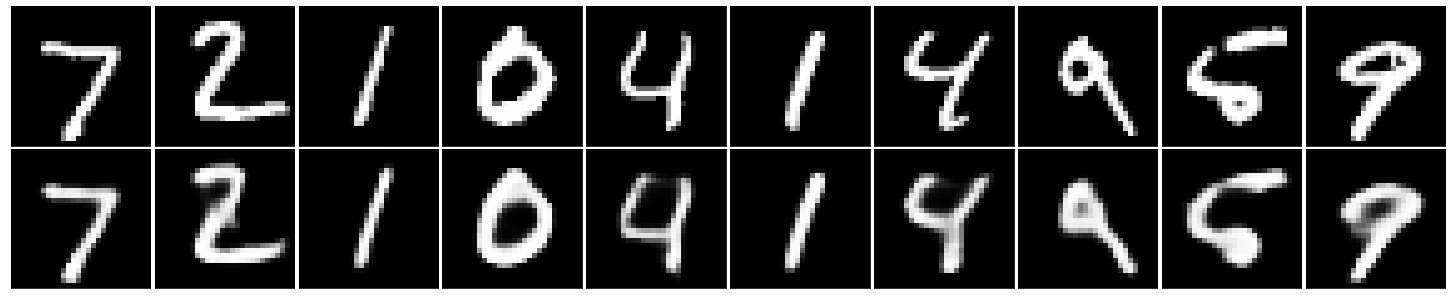

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

In [7]:
sess.close()

In [8]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

conv1 = tf.layers.conv2d(inputs_, 32, (3,3), padding='same', activation=tf.nn.relu)
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
conv2 = tf.layers.conv2d(maxpool1, 32, (3,3), padding='same', activation=tf.nn.relu)
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
conv3 = tf.layers.conv2d(maxpool2, 16, (3,3), padding='same', activation=tf.nn.relu)
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')

upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
conv4 = tf.layers.conv2d(upsample1, 16, (3,3), padding='same', activation=tf.nn.relu)
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
conv5 = tf.layers.conv2d(upsample2, 32, (3,3), padding='same', activation=tf.nn.relu)
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
conv6 = tf.layers.conv2d(upsample3, 32, (3,3), padding='same', activation=tf.nn.relu)

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [9]:
sess = tf.Session()

In [10]:
epochs = 30
batch_size = 1024
noise_factor = 0.3
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))



Epoch: 1/30... Training loss: 0.6948
Epoch: 1/30... Training loss: 0.6723
Epoch: 1/30... Training loss: 0.6458
Epoch: 1/30... Training loss: 0.6102
Epoch: 1/30... Training loss: 0.5647
Epoch: 1/30... Training loss: 0.5252
Epoch: 1/30... Training loss: 0.5217
Epoch: 1/30... Training loss: 0.5413
Epoch: 1/30... Training loss: 0.5373
Epoch: 1/30... Training loss: 0.5183
Epoch: 1/30... Training loss: 0.4938
Epoch: 1/30... Training loss: 0.4874
Epoch: 1/30... Training loss: 0.4749
Epoch: 1/30... Training loss: 0.4706
Epoch: 1/30... Training loss: 0.4658
Epoch: 1/30... Training loss: 0.4549
Epoch: 1/30... Training loss: 0.4435
Epoch: 1/30... Training loss: 0.4339
Epoch: 1/30... Training loss: 0.4248
Epoch: 1/30... Training loss: 0.4068
Epoch: 1/30... Training loss: 0.3918
Epoch: 1/30... Training loss: 0.3748
Epoch: 1/30... Training loss: 0.3623
Epoch: 1/30... Training loss: 0.3503
Epoch: 1/30... Training loss: 0.3314
Epoch: 1/30... Training loss: 0.3174
Epoch: 1/30... Training loss: 0.3055
E

Epoch: 4/30... Training loss: 0.1432
Epoch: 4/30... Training loss: 0.1456
Epoch: 4/30... Training loss: 0.1452
Epoch: 4/30... Training loss: 0.1451
Epoch: 4/30... Training loss: 0.1450
Epoch: 4/30... Training loss: 0.1450
Epoch: 4/30... Training loss: 0.1421
Epoch: 4/30... Training loss: 0.1436
Epoch: 4/30... Training loss: 0.1430
Epoch: 5/30... Training loss: 0.1456
Epoch: 5/30... Training loss: 0.1411
Epoch: 5/30... Training loss: 0.1434
Epoch: 5/30... Training loss: 0.1426
Epoch: 5/30... Training loss: 0.1424
Epoch: 5/30... Training loss: 0.1426
Epoch: 5/30... Training loss: 0.1414
Epoch: 5/30... Training loss: 0.1407
Epoch: 5/30... Training loss: 0.1420
Epoch: 5/30... Training loss: 0.1410
Epoch: 5/30... Training loss: 0.1402
Epoch: 5/30... Training loss: 0.1396
Epoch: 5/30... Training loss: 0.1403
Epoch: 5/30... Training loss: 0.1389
Epoch: 5/30... Training loss: 0.1393
Epoch: 5/30... Training loss: 0.1412
Epoch: 5/30... Training loss: 0.1395
Epoch: 5/30... Training loss: 0.1394
E

Epoch: 8/30... Training loss: 0.1228
Epoch: 8/30... Training loss: 0.1236
Epoch: 8/30... Training loss: 0.1215
Epoch: 8/30... Training loss: 0.1219
Epoch: 8/30... Training loss: 0.1244
Epoch: 8/30... Training loss: 0.1259
Epoch: 8/30... Training loss: 0.1239
Epoch: 8/30... Training loss: 0.1233
Epoch: 8/30... Training loss: 0.1226
Epoch: 8/30... Training loss: 0.1211
Epoch: 8/30... Training loss: 0.1208
Epoch: 8/30... Training loss: 0.1223
Epoch: 8/30... Training loss: 0.1229
Epoch: 8/30... Training loss: 0.1234
Epoch: 8/30... Training loss: 0.1224
Epoch: 8/30... Training loss: 0.1222
Epoch: 8/30... Training loss: 0.1201
Epoch: 8/30... Training loss: 0.1236
Epoch: 9/30... Training loss: 0.1206
Epoch: 9/30... Training loss: 0.1199
Epoch: 9/30... Training loss: 0.1211
Epoch: 9/30... Training loss: 0.1212
Epoch: 9/30... Training loss: 0.1211
Epoch: 9/30... Training loss: 0.1201
Epoch: 9/30... Training loss: 0.1201
Epoch: 9/30... Training loss: 0.1232
Epoch: 9/30... Training loss: 0.1214
E

Epoch: 12/30... Training loss: 0.1145
Epoch: 12/30... Training loss: 0.1142
Epoch: 12/30... Training loss: 0.1145
Epoch: 12/30... Training loss: 0.1145
Epoch: 12/30... Training loss: 0.1127
Epoch: 12/30... Training loss: 0.1105
Epoch: 12/30... Training loss: 0.1144
Epoch: 12/30... Training loss: 0.1139
Epoch: 12/30... Training loss: 0.1152
Epoch: 12/30... Training loss: 0.1105
Epoch: 12/30... Training loss: 0.1118
Epoch: 12/30... Training loss: 0.1130
Epoch: 12/30... Training loss: 0.1133
Epoch: 12/30... Training loss: 0.1146
Epoch: 12/30... Training loss: 0.1148
Epoch: 12/30... Training loss: 0.1145
Epoch: 12/30... Training loss: 0.1132
Epoch: 12/30... Training loss: 0.1115
Epoch: 12/30... Training loss: 0.1146
Epoch: 12/30... Training loss: 0.1144
Epoch: 12/30... Training loss: 0.1126
Epoch: 12/30... Training loss: 0.1145
Epoch: 12/30... Training loss: 0.1146
Epoch: 12/30... Training loss: 0.1134
Epoch: 12/30... Training loss: 0.1118
Epoch: 12/30... Training loss: 0.1116
Epoch: 12/30

Epoch: 16/30... Training loss: 0.1084
Epoch: 16/30... Training loss: 0.1095
Epoch: 16/30... Training loss: 0.1089
Epoch: 16/30... Training loss: 0.1089
Epoch: 16/30... Training loss: 0.1083
Epoch: 16/30... Training loss: 0.1080
Epoch: 16/30... Training loss: 0.1086
Epoch: 16/30... Training loss: 0.1086
Epoch: 16/30... Training loss: 0.1069
Epoch: 16/30... Training loss: 0.1075
Epoch: 16/30... Training loss: 0.1077
Epoch: 16/30... Training loss: 0.1073
Epoch: 16/30... Training loss: 0.1098
Epoch: 16/30... Training loss: 0.1073
Epoch: 16/30... Training loss: 0.1083
Epoch: 16/30... Training loss: 0.1092
Epoch: 16/30... Training loss: 0.1091
Epoch: 16/30... Training loss: 0.1077
Epoch: 16/30... Training loss: 0.1078
Epoch: 16/30... Training loss: 0.1100
Epoch: 16/30... Training loss: 0.1070
Epoch: 16/30... Training loss: 0.1102
Epoch: 16/30... Training loss: 0.1066
Epoch: 16/30... Training loss: 0.1082
Epoch: 16/30... Training loss: 0.1070
Epoch: 16/30... Training loss: 0.1076
Epoch: 16/30

Epoch: 19/30... Training loss: 0.1056
Epoch: 19/30... Training loss: 0.1048
Epoch: 19/30... Training loss: 0.1050
Epoch: 19/30... Training loss: 0.1037
Epoch: 19/30... Training loss: 0.1032
Epoch: 19/30... Training loss: 0.1046
Epoch: 20/30... Training loss: 0.1053
Epoch: 20/30... Training loss: 0.1051
Epoch: 20/30... Training loss: 0.1045
Epoch: 20/30... Training loss: 0.1051
Epoch: 20/30... Training loss: 0.1036
Epoch: 20/30... Training loss: 0.1031
Epoch: 20/30... Training loss: 0.1042
Epoch: 20/30... Training loss: 0.1040
Epoch: 20/30... Training loss: 0.1066
Epoch: 20/30... Training loss: 0.1072
Epoch: 20/30... Training loss: 0.1064
Epoch: 20/30... Training loss: 0.1047
Epoch: 20/30... Training loss: 0.1035
Epoch: 20/30... Training loss: 0.1034
Epoch: 20/30... Training loss: 0.1034
Epoch: 20/30... Training loss: 0.1059
Epoch: 20/30... Training loss: 0.1036
Epoch: 20/30... Training loss: 0.1031
Epoch: 20/30... Training loss: 0.1034
Epoch: 20/30... Training loss: 0.1053
Epoch: 20/30

Epoch: 23/30... Training loss: 0.1020
Epoch: 23/30... Training loss: 0.1016
Epoch: 23/30... Training loss: 0.1009
Epoch: 23/30... Training loss: 0.1022
Epoch: 23/30... Training loss: 0.0997
Epoch: 23/30... Training loss: 0.1021
Epoch: 23/30... Training loss: 0.1032
Epoch: 23/30... Training loss: 0.1021
Epoch: 23/30... Training loss: 0.1013
Epoch: 23/30... Training loss: 0.1003
Epoch: 23/30... Training loss: 0.1026
Epoch: 23/30... Training loss: 0.1021
Epoch: 23/30... Training loss: 0.1034
Epoch: 23/30... Training loss: 0.1013
Epoch: 23/30... Training loss: 0.1024
Epoch: 23/30... Training loss: 0.1016
Epoch: 23/30... Training loss: 0.1017
Epoch: 23/30... Training loss: 0.1036
Epoch: 23/30... Training loss: 0.1033
Epoch: 23/30... Training loss: 0.1023
Epoch: 23/30... Training loss: 0.1021
Epoch: 23/30... Training loss: 0.0992
Epoch: 24/30... Training loss: 0.1017
Epoch: 24/30... Training loss: 0.1038
Epoch: 24/30... Training loss: 0.1027
Epoch: 24/30... Training loss: 0.1032
Epoch: 24/30

Epoch: 27/30... Training loss: 0.0991
Epoch: 27/30... Training loss: 0.0990
Epoch: 27/30... Training loss: 0.1005
Epoch: 27/30... Training loss: 0.0989
Epoch: 27/30... Training loss: 0.0988
Epoch: 27/30... Training loss: 0.0986
Epoch: 27/30... Training loss: 0.0986
Epoch: 27/30... Training loss: 0.1003
Epoch: 27/30... Training loss: 0.0999
Epoch: 27/30... Training loss: 0.0996
Epoch: 27/30... Training loss: 0.1008
Epoch: 27/30... Training loss: 0.1014
Epoch: 27/30... Training loss: 0.1002
Epoch: 27/30... Training loss: 0.1022
Epoch: 27/30... Training loss: 0.1015
Epoch: 27/30... Training loss: 0.1020
Epoch: 27/30... Training loss: 0.1003
Epoch: 27/30... Training loss: 0.0995
Epoch: 27/30... Training loss: 0.0999
Epoch: 27/30... Training loss: 0.0993
Epoch: 27/30... Training loss: 0.0993
Epoch: 27/30... Training loss: 0.1002
Epoch: 27/30... Training loss: 0.1001
Epoch: 27/30... Training loss: 0.0999
Epoch: 27/30... Training loss: 0.0990
Epoch: 27/30... Training loss: 0.0998
Epoch: 27/30

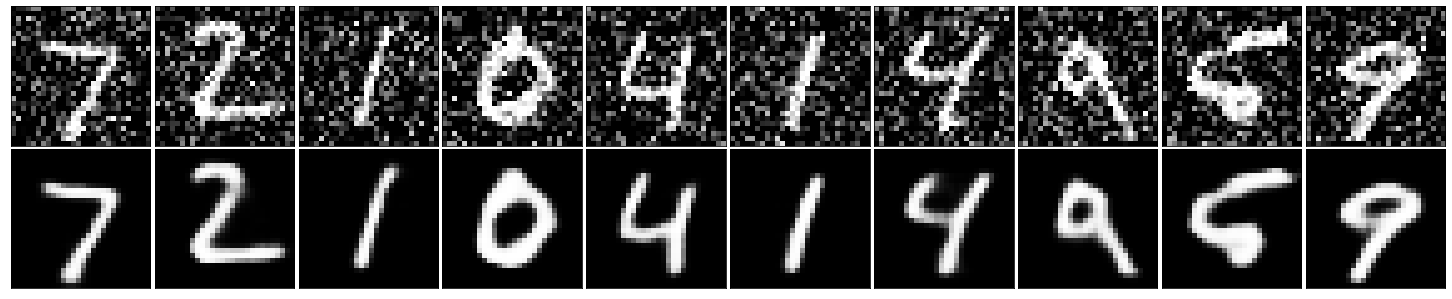

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()